In [1]:
%pip install pandas 
%pip install numpy
%pip install matplotlib seaborn plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import os

# Ruta 
carpeta = "./csv/"

# Recorre los archivos CSV 
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta, archivo)
        try:
            df = pd.read_csv(ruta)
            filas, columnas = df.shape
            print(f"\n📁 Archivo: {archivo}")
            print(f"✔️ Filas: {filas} | Columnas: {columnas}")
            print(f"🧩 Columnas: {list(df.columns)}")
            if filas >= 10000 and columnas >= 10:
                print("✅ Este archivo cumple con los requisitos del proyecto.")
            else:
                print("⚠️ Este archivo NO cumple con los requisitos.")
        except Exception as e:
            print(f"\n❌ Error al leer {archivo}: {e}")


📁 Archivo: apellidos_cantidad_personas_provincia.csv
✔️ Filas: 321516 | Columnas: 4
🧩 Columnas: ['apellido', 'cantidad', 'provincia_id', 'provincia_nombre']
⚠️ Este archivo NO cumple con los requisitos.

📁 Archivo: apellidos_mas_frecuentes_pais.csv
✔️ Filas: 20 | Columnas: 3
🧩 Columnas: ['apellido', 'porcentaje_de_poblacion_portadora', 'ranking']
⚠️ Este archivo NO cumple con los requisitos.

📁 Archivo: apellidos_mas_frecuentes_provincia.csv
✔️ Filas: 480 | Columnas: 5
🧩 Columnas: ['provincia_id', 'provincia_nombre', 'apellido', 'ranking', 'porcentaje_poblacion_portadora']
⚠️ Este archivo NO cumple con los requisitos.

📁 Archivo: dataset_combinado.csv
✔️ Filas: 321516 | Columnas: 6
🧩 Columnas: ['apellido', 'cantidad', 'provincia_id', 'provincia_nombre', 'ranking', 'porcentaje_poblacion_portadora']
⚠️ Este archivo NO cumple con los requisitos.


In [10]:
import pandas as pd
import os

# Ruta donde están archivos CSV
carpeta = "./csv/"

# Lista para  resultados
resumen_columnas = []

# Recorre los archivos CSV
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta, archivo)
        try:
            df = pd.read_csv(ruta, low_memory=False)
            resumen_columnas.append((archivo, df.shape[1]))
        except Exception as e:
            resumen_columnas.append((archivo, f"Error: {e}"))

# Muestra resultados ordenados por cantidad de columnas
resumen_columnas.sort(key=lambda x: x[1] if isinstance(x[1], int) else -1, reverse=True)

print("\n📊 Cantidad de columnas por archivo:")
for nombre, columnas in resumen_columnas:
    print(f"{nombre:<50} → {columnas} columnas")


📊 Cantidad de columnas por archivo:
dataset_combinado.csv                              → 6 columnas
apellidos_mas_frecuentes_provincia.csv             → 5 columnas
apellidos_cantidad_personas_provincia.csv          → 4 columnas
apellidos_mas_frecuentes_pais.csv                  → 3 columnas


In [11]:
import pandas as pd
import os


carpeta = "./csv/"


resumen_filas = []

#todos los archivos CSV
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta, archivo)
        try:
            df = pd.read_csv(ruta, low_memory=False)
            resumen_filas.append((archivo, df.shape[0]))
        except Exception as e:
            resumen_filas.append((archivo, f"Error: {e}"))

#resultados ordenados por cantidad de filas
resumen_filas.sort(key=lambda x: x[1] if isinstance(x[1], int) else -1, reverse=True)

print("\n📊 Cantidad de filas por archivo:")
for nombre, filas in resumen_filas:
    print(f"{nombre:<50} → {filas} filas")


📊 Cantidad de filas por archivo:
apellidos_cantidad_personas_provincia.csv          → 321516 filas
dataset_combinado.csv                              → 321516 filas
apellidos_mas_frecuentes_provincia.csv             → 480 filas
apellidos_mas_frecuentes_pais.csv                  → 20 filas


In [12]:
import pandas as pd

# Cargar datasets con columnas relevantes
df_apellidos = pd.read_csv("./csv/apellidos_cantidad_personas_provincia.csv", usecols=["apellido", "cantidad", "provincia_id", "provincia_nombre"])
df_frecuentes = pd.read_csv("./csv/apellidos_mas_frecuentes_provincia.csv", usecols=["apellido", "provincia_id", "ranking", "porcentaje_poblacion_portadora"])

# Unir por apellido y provincia
df_combinado = pd.merge(df_apellidos, df_frecuentes, on=["apellido", "provincia_id"], how="left")
df_combinado.to_csv("./csv/dataset_combinado.csv", index=False)

# Mostrar resultado
print("🔗 Dataset combinado:")
print(f"Filas: {df_combinado.shape[0]} | Columnas: {df_combinado.shape[1]}")
print("Columnas:", list(df_combinado.columns))
print("Tipos de datos:\n", df_combinado.dtypes)
print("Valores nulos:\n", df_combinado.isnull().sum())

🔗 Dataset combinado:
Filas: 321516 | Columnas: 6
Columnas: ['apellido', 'cantidad', 'provincia_id', 'provincia_nombre', 'ranking', 'porcentaje_poblacion_portadora']
Tipos de datos:
 apellido                           object
cantidad                            int64
provincia_id                        int64
provincia_nombre                   object
ranking                           float64
porcentaje_poblacion_portadora    float64
dtype: object
Valores nulos:
 apellido                               0
cantidad                               0
provincia_id                           0
provincia_nombre                       0
ranking                           321305
porcentaje_poblacion_portadora    321305
dtype: int64


In [13]:
import numpy as np
import pandas as pd

# Cargar el dataset combinado
df = pd.read_csv("./csv/dataset_combinado.csv") 

# Selección de variables
num_vars = ["cantidad", "ranking", "porcentaje_poblacion_portadora"]
cat_vars = ["apellido", "provincia_id", "provincia_nombre"]

# Convertir a arrays NumPy
cantidad_array = df["cantidad"].values
porcentaje_array = df["porcentaje_poblacion_portadora"].fillna(0).values  # Rellenamos nulos con 0

# Función para análisis estadístico
def analizar_array(arr, nombre):
    print(f"\n📊 Análisis de: {nombre}")
    print(f"Media: {np.mean(arr):.2f}")
    print(f"Mediana: {np.median(arr):.2f}")
    print(f"Desviación estándar: {np.std(arr):.2f}")
    print(f"Percentiles (25, 50, 75): {np.percentile(arr, [25, 50, 75])}")

analizar_array(cantidad_array, "cantidad")
analizar_array(porcentaje_array, "porcentaje_poblacion_portadora")

# Normalización de 'cantidad'
df["cantidad_normalizada"] = (df["cantidad"] - df["cantidad"].mean()) / df["cantidad"].std()

# Columnas derivadas
df["cantidad_log"] = np.log1p(df["cantidad"])  
df["apellido_frecuente"] = df["ranking"].apply(lambda x: "Sí" if pd.notnull(x) else "No")




📊 Análisis de: cantidad
Media: 143.79
Mediana: 24.00
Desviación estándar: 1600.12
Percentiles (25, 50, 75): [14. 24. 55.]

📊 Análisis de: porcentaje_poblacion_portadora
Media: 0.00
Mediana: 0.00
Desviación estándar: 0.02
Percentiles (25, 50, 75): [0. 0. 0.]


In [14]:
# Manejo de nulos
df["ranking"] = df["ranking"].fillna(-1)
df["porcentaje_poblacion_portadora"] = df["porcentaje_poblacion_portadora"].fillna(0)

# Agrupación por provincia
agrupado = df.groupby("provincia_nombre")["cantidad"].sum().sort_values(ascending=False)
print("\nCantidad total por provincia:")
print(agrupado)

# Nuevas columnas derivadas
df["cantidad_log"] = np.log1p(df["cantidad"])
df["apellido_frecuente"] = df["ranking"].apply(lambda x: "Sí" if x > 0 else "No")


Cantidad total por provincia:
provincia_nombre
Buenos Aires              17829146
Córdoba                    3806552
Santa Fe                   3496117
Ciudad de Buenos Aires     3399589
Mendoza                    1951323
Tucumán                    1681282
Salta                      1458042
Entre Ríos                 1406352
Misiones                   1346569
Chaco                      1285915
Corrientes                 1178621
Santiago del Estero        1056976
San Juan                    798285
Jujuy                       777219
Río Negro                   725526
Neuquén                     683221
Formosa                     647923
Chubut                      571577
San Luis                    494232
Catamarca                   421808
La Rioja                    381778
La Pampa                    344987
Santa Cruz                  328505
Tierra del Fuego            160053
Name: cantidad, dtype: int64


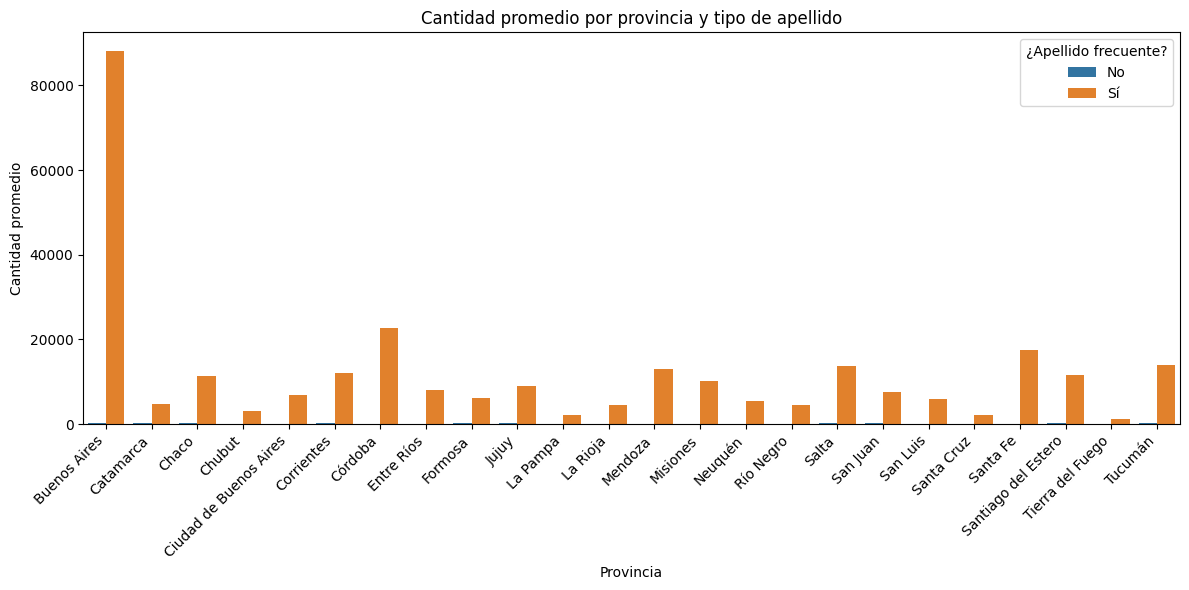

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamos por provincia y tipo de apellido
agrupado = df.groupby(["provincia_nombre", "apellido_frecuente"])["cantidad"].mean().reset_index()


agrupado.rename(columns={"cantidad": "cantidad_promedio"}, inplace=True)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x="provincia_nombre", y="cantidad_promedio", hue="apellido_frecuente")
plt.title("Cantidad promedio por provincia y tipo de apellido")
plt.xlabel("Provincia")
plt.ylabel("Cantidad promedio")
plt.xticks(rotation=45, ha="right")
plt.legend(title="¿Apellido frecuente?")
plt.tight_layout()
plt.show()

In [16]:
# Top 20 apellidos con mayor cantidad total
top_apellidos = df.groupby("apellido")["cantidad"].sum().sort_values(ascending=False).head(20)
print("🔝 Apellidos más frecuentes en Argentina:")
print(top_apellidos)

🔝 Apellidos más frecuentes en Argentina:
apellido
Gonzalez     783399
Rodriguez    622643
Gomez        576647
Lopez        520897
Fernandez    520713
Martinez     467014
Diaz         458017
Perez        371706
Sanchez      360726
Romero       356015
Garcia       347660
Sosa         256043
Benitez      236845
Ramirez      234866
Ruiz         232729
Torres       232413
Flores       226614
Alvarez      213978
Acosta       199717
Rojas        195334
Name: cantidad, dtype: int64


In [17]:
# Filtrar solo apellidos frecuentes
frecuentes = df[df["apellido_frecuente"] == "Sí"]

# Agrupar por provincia y apellido
top_por_provincia = frecuentes.groupby(["provincia_nombre", "apellido"])["cantidad"].sum().reset_index()

# Mostrar los 5 más frecuentes por provincia
for provincia in top_por_provincia["provincia_nombre"].unique():
    print(f"\n📍 Provincia: {provincia}")
    top5 = top_por_provincia[top_por_provincia["provincia_nombre"] == provincia].sort_values(by="cantidad", ascending=False).head(5)
    print(top5[["apellido", "cantidad"]])


📍 Provincia: Buenos Aires
  apellido  cantidad
3   Romero    126456
5     Sosa     91039
4     Ruiz     87000
6   Torres     80654
0   Acosta     80146

📍 Provincia: Catamarca
       apellido  cantidad
8       Carrizo      8718
14       Romero      6703
10      Herrera      6014
12        Nieva      5347
7   Barrionuevo      4656

📍 Provincia: Chaco
   apellido  cantidad
22   Romero     21583
18  Aguirre     12763
24     Sosa     11234
23     Ruiz      9878
21    Ojeda      9788

📍 Provincia: Chubut
    apellido  cantidad
28     Muñoz      3797
30      Soto      3570
32    Vargas      3491
26  Mansilla      3412
25    Flores      3117

📍 Provincia: Ciudad de Buenos Aires
   apellido  cantidad
36   Romero     16296
33   Flores     14553
34   Mamani     13541
35    Rojas     13220
37     Ruiz     12438

📍 Provincia: Corrientes
   apellido  cantidad
46   Romero     27860
39  Aguirre     14366
45    Ojeda     12970
47     Sosa     10504
44  Maidana      9910

📍 Provincia: Córdoba
    apel

In [18]:
# Ordenar por porcentaje
top_porcentaje = df.sort_values(by="porcentaje_poblacion_portadora", ascending=False).head(20)
print("📈 Apellidos con mayor porcentaje de población portadora:")
print(top_porcentaje[["apellido", "provincia_nombre", "porcentaje_poblacion_portadora"]])

📈 Apellidos con mayor porcentaje de población portadora:
       apellido     provincia_nombre  porcentaje_poblacion_portadora
155576   Romero           Corrientes                           2.267
267518   Lucero             San Luis                           2.241
204803   Mamani                Jujuy                           2.219
204804     Cruz                Jujuy                           2.218
95127   Carrizo            Catamarca                           1.986
204805   Flores                Jujuy                           1.919
214112   Romero             La Rioja                           1.918
267519     Sosa             San Luis                           1.888
263328   Castro             San Juan                           1.882
97285    Romero                Chaco                           1.615
95129    Romero            Catamarca                           1.513
256345   Flores                Salta                           1.437
313650   Medina              Tucumán          

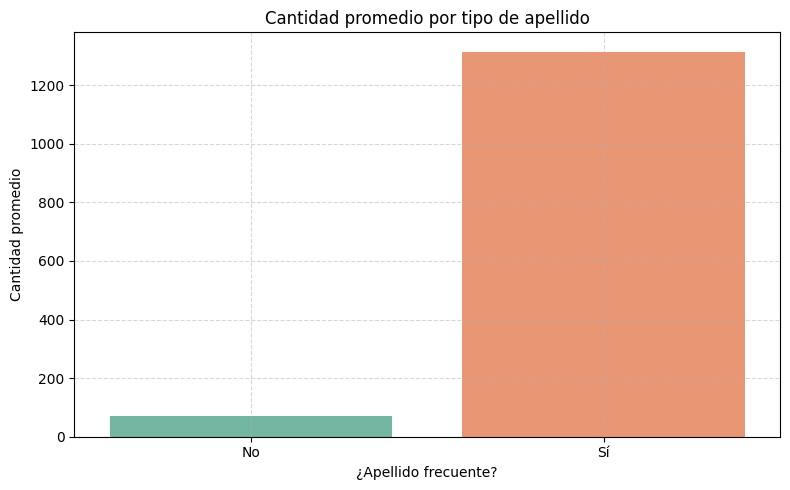

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar outliers extremos (por ejemplo, el 1% superior)
limite_superior = np.percentile(df["cantidad"], 99)
df_filtrado = df[df["cantidad"] <= limite_superior]

promedios = df_filtrado.groupby("apellido_frecuente")["cantidad"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=promedios, x="apellido_frecuente", y="cantidad", hue="apellido_frecuente", palette="Set2", legend=False)
plt.title("Cantidad promedio por tipo de apellido")
plt.xlabel("¿Apellido frecuente?")
plt.ylabel("Cantidad promedio")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

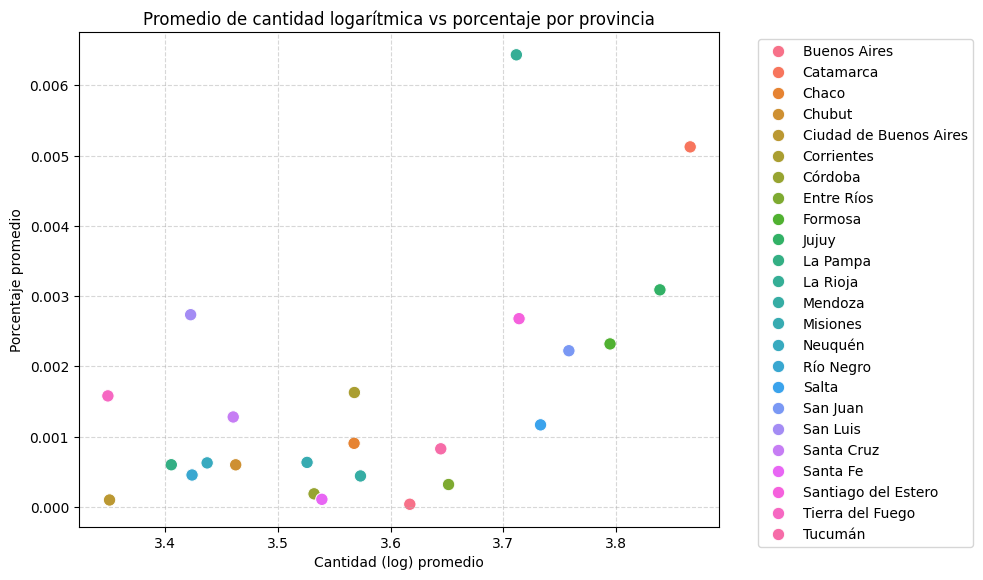

In [23]:
# Agrupar por provincia
agrupado = df.groupby("provincia_nombre")[["cantidad_log", "porcentaje_poblacion_portadora"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=agrupado, x="cantidad_log", y="porcentaje_poblacion_portadora", hue="provincia_nombre", s=80)
plt.title("Promedio de cantidad logarítmica vs porcentaje por provincia")
plt.xlabel("Cantidad (log) promedio")
plt.ylabel("Porcentaje promedio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Preguntas de investigación
- ¿Qué provincias concentran la mayor cantidad de personas con apellidos frecuentes?
- ¿Existe relación entre la cantidad de personas con un apellido y su ranking nacional?
- ¿Qué tan **desigual** es la distribución de apellidos en Argentina?


## Conclusiones del análisis

Este análisis exploró la distribución de apellidos en Argentina a partir de un dataset de más de **320,000 registros**. Se identificaron patrones de concentración por provincia, se compararon apellidos frecuentes con no frecuentes, y se analizó la relación entre cantidad y porcentaje poblacional.

Los resultados muestran que ciertas provincias como **Buenos Aires** y **Córdoba** concentran la mayor cantidad de personas con apellidos frecuentes. Además, existe una **correlación moderada** entre la cantidad y el ranking, aunque no todos los apellidos más comunes tienen alta representación porcentual.

La distribución es **desigual**, con muchos apellidos poco frecuentes y unos pocos muy dominantes. Esto sugiere una estructura demográfica marcada por **concentración histórica y migratoria**.

El análisis se complementó con **visualizaciones** y **transformaciones estadísticas** que permiten profundizar en la dinámica cultural y poblacional del país.